# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

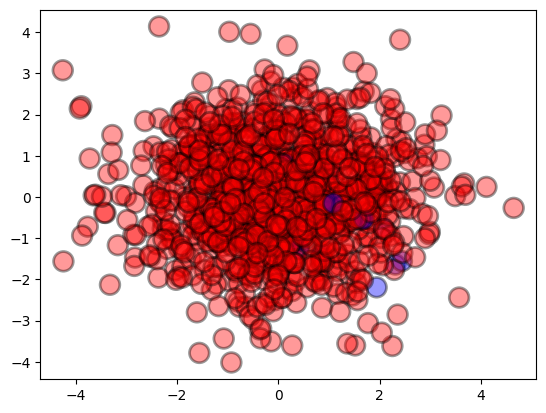

In [2]:
N1 = 10
N2 = 1000
data_clf = data.get_non_sep_data_high_dim(
    N1=N1,
    N2=N2,
    scale=False)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

clf


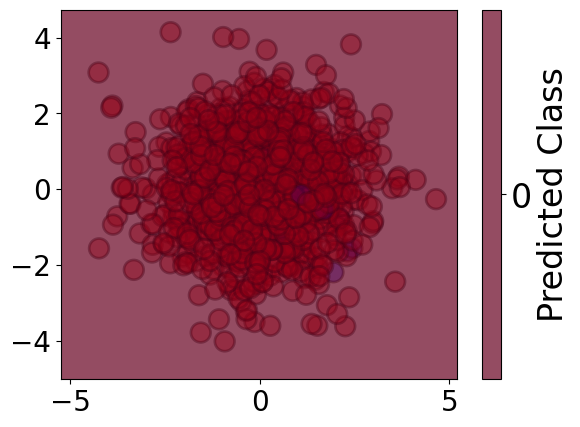

SMOTE


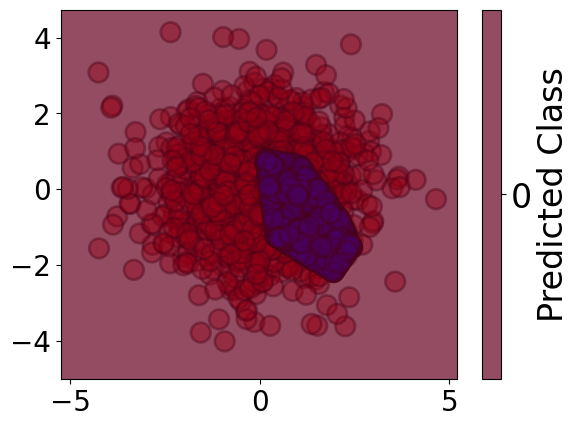

In [3]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)
data_clf['clf'] = classifiers_dict['original']                      

## Fit deltas

Original Data


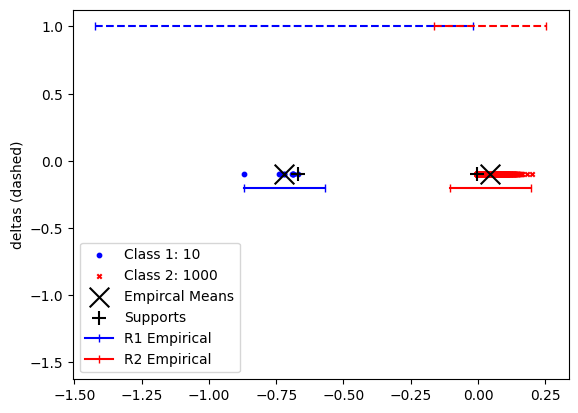

ZeroDivisionError: float division by zero

In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf
).fit(X, y, alpha=1000, _print=True, _plot=True, max_trials=100000, parallel=True)

## Plot training data information

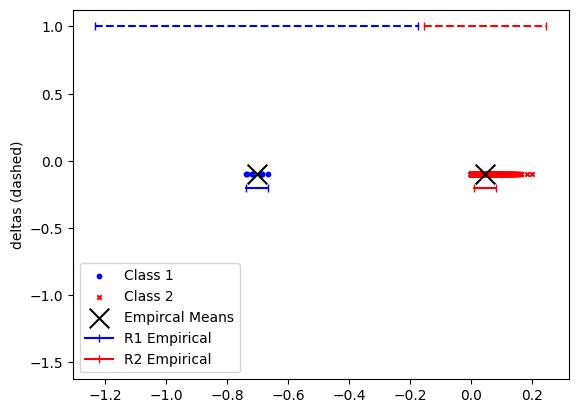

In [ ]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [ ]:
deltas_model.print_params()

Parameters
                R:  0.7391249305792216
                N1: 9
                N2: 999
                R1: 0.03612552621892107
                R2: 0.15384514724944767
                M:  0.5588613375363102
                D:  0.7488320110046789
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.5
SMOTE accuracy: 0.5
deltas accuracy: 0.50115

original F1: 0.6666666666666666
SMOTE F1: 0.6666666666666666
deltas F1: 0.6671115411564512

original precision0: 0.0
SMOTE precision0: 0.0
deltas precision0: 0.896551724137931

original precision1: 0.5
SMOTE precision1: 0.5
deltas precision1: 0.500575834960693

original


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


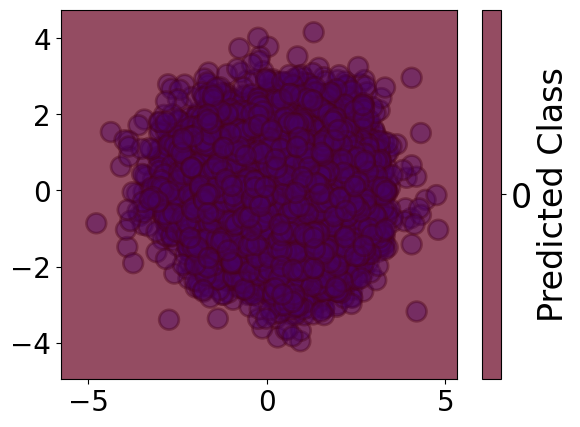

SMOTE


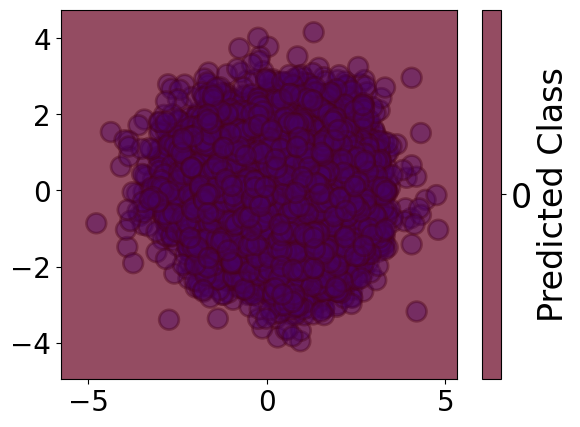

deltas


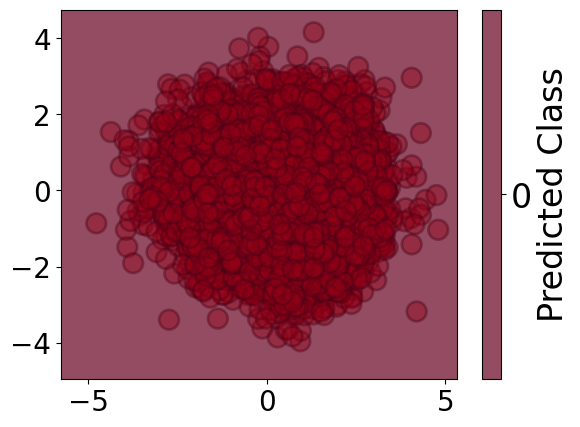

ValueError: maximum supported dimension for an ndarray is 32, found 100

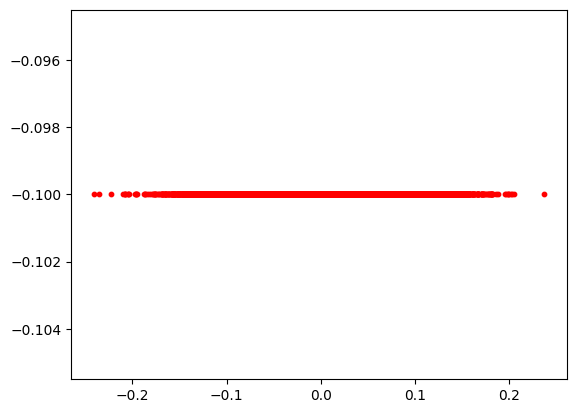

In [ ]:
classifiers_dict['deltas'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])